In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [3]:
df.shape

(908, 13)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
df['cp'].unique()

array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)

In [8]:
df['fbs'].unique()

array([ True, False])

In [9]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [10]:
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [11]:
df['slope'].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

In [12]:
df['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

In [13]:
df['sex']=df['sex'].map({'Male':1,'Female':2})
df['cp']=df['cp'].map({'typical angina':1,'atypical angina':2,'asymptomatic':3,'non-anginal':4})
df['restecg']=df['restecg'].map({'lv hypertrophy':1,'normal':2,'st-t abnormality':3})
df['slope']=df['slope'].map({'downsloping':1,'flat':2,'upsloping':3})
df['thal']=df['thal'].map({'fixed defect':1,'normal':2,'reversable defect':3})
df=df.replace({True: 1, False: 0,'FALSE':0,'TURE':1})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,1,145,233,1,1,150,0,2.3,1,1,0
1,41,1,2,135,203,0,2,132,0,0.0,2,1,0
2,57,1,3,140,192,0,2,148,0,0.4,2,1,0
3,52,1,1,118,186,0,1,190,0,0.0,2,1,0
4,57,1,3,110,201,0,2,126,1,1.5,2,1,0


In [14]:
df['exang'].value_counts()

0    535
1    373
Name: exang, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    int64  
 2   cp        908 non-null    int64  
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    int64  
 6   restecg   908 non-null    int64  
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    int64  
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    int64  
 11  thal      908 non-null    int64  
 12  num       908 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 92.3 KB


In [16]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [17]:
df.dropna(subset=["oldpeak"], inplace=True)

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

C:\Users\Nanja\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


<AxesSubplot:>

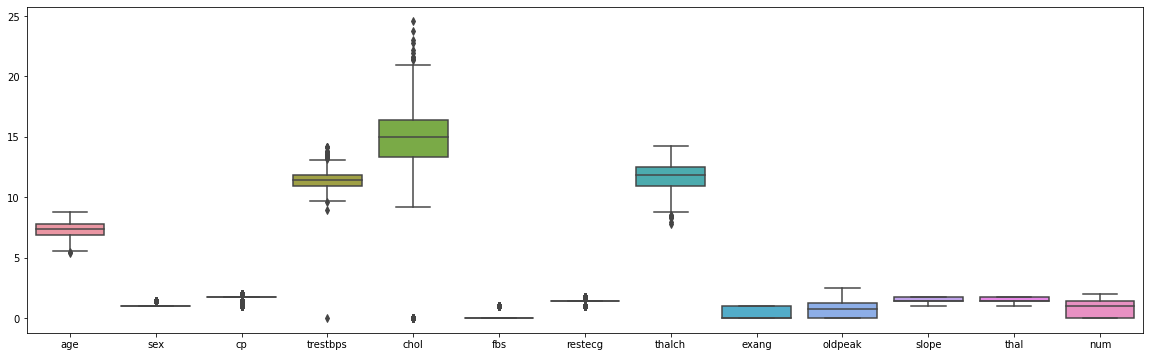

In [19]:
# Creating boxplot for all the features
plt.figure(figsize=(20,6))
sns.boxplot(data=np.sqrt(df))

<AxesSubplot:xlabel='thal', ylabel='count'>

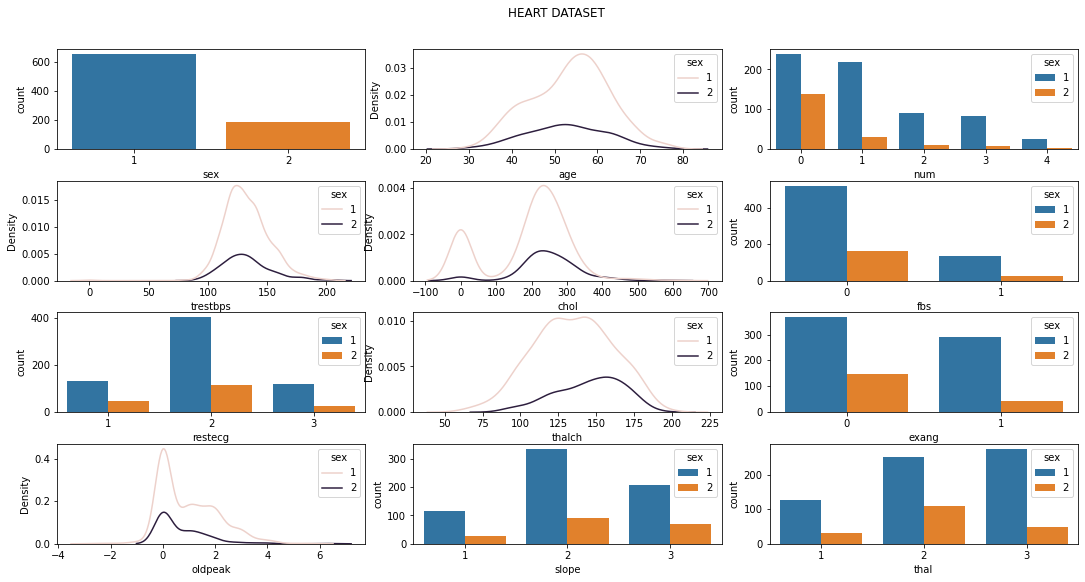

In [20]:
fig,axe = plt.subplots(4,3, figsize=(15,8))
plt.suptitle('HEART DATASET\n')
plt.tight_layout()
sns.countplot(data =df, x='sex',ax=axe[0,0])
sns.kdeplot(data = df,x='age',hue='sex',ax=axe[0,1]).set_xticks(np.arange(20, 90, 10))
sns.countplot(data=df,x='num',hue='sex',ax=axe[0,2])
sns.kdeplot(data=df,x='trestbps',hue='sex',ax=axe[1,0])
sns.kdeplot(data=df,x='chol',hue='sex',ax=axe[1,1])
sns.countplot(data=df,x='fbs',hue='sex',ax=axe[1,2])
sns.countplot(data=df,x='restecg',hue='sex',ax=axe[2,0])
sns.kdeplot(data=df,x='thalch',hue='sex',ax=axe[2,1])
sns.countplot(data=df,x='exang',hue='sex',ax=axe[2,2])
sns.kdeplot(data=df,x='oldpeak',hue='sex',ax=axe[3,0])
sns.countplot(data=df,x='slope',hue='sex',ax=axe[3,1])
sns.countplot(data=df,x='thal',hue='sex',ax=axe[3,2])

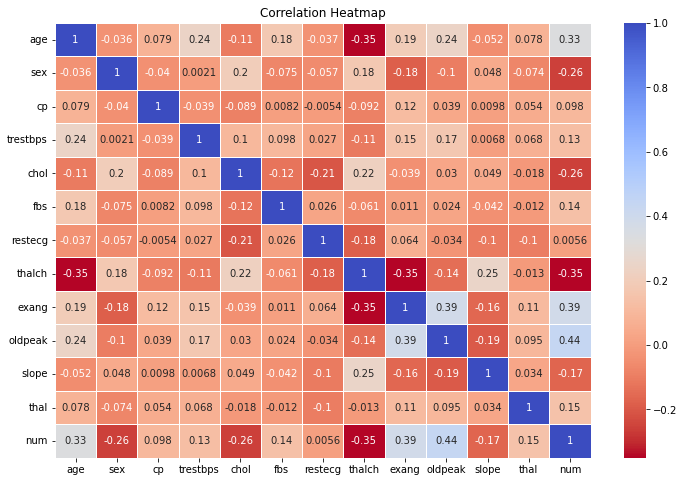

In [21]:
# Generate a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm_r', annot=True,linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Age is highly negatively correlated with maximum heart rate acheived(thalch).

Maximum heart rate achieved (thalch) has lowest negative correlation with Stages of heart disease(num)

Maximum heart rate achieved (thalch) is also highly negatively correlated  with exercise induced angina (exang)

ST Depression induced by exercise(oldpeak) is highly negatively correlated with Maximum heart rate achieved (thalch)

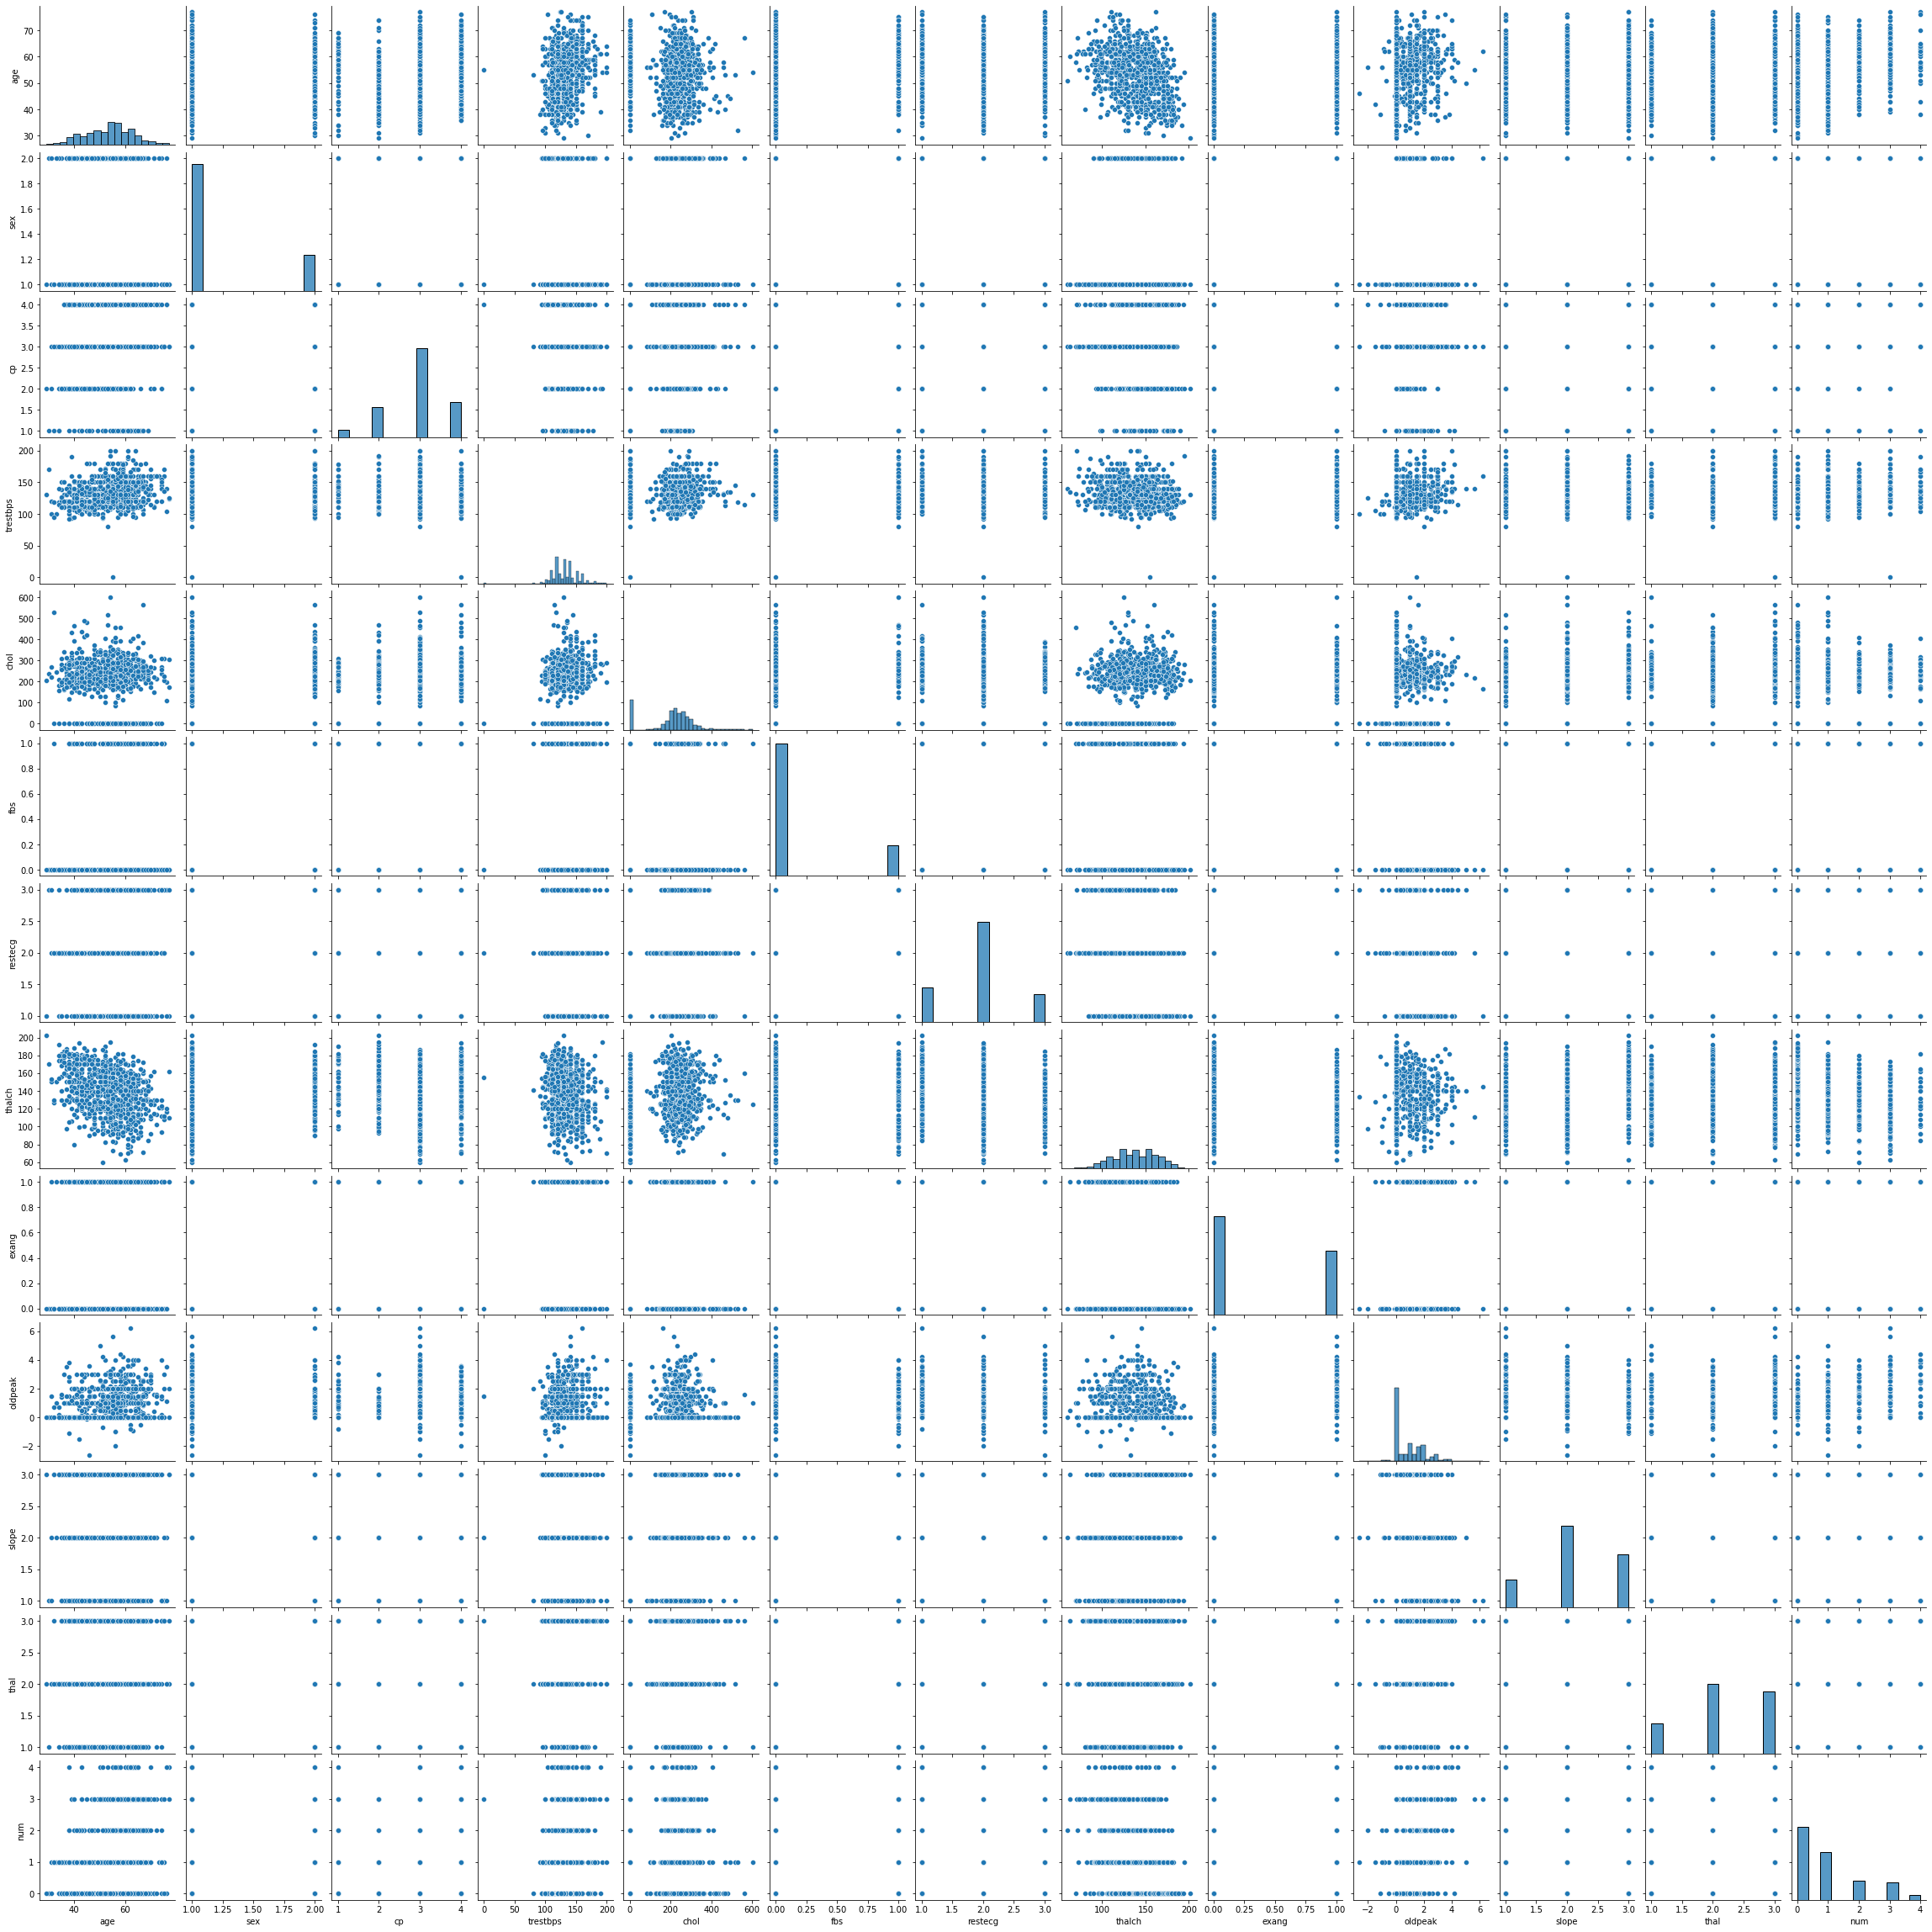

In [22]:
sns.pairplot(df)

In [23]:
#Split the dataset into input and output/target columns
X = df.iloc[:,:12]
y = df.iloc[:,12]

In [24]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,1,145,233,1,1,150,0,2.3,1,1
1,41,1,2,135,203,0,2,132,0,0.0,2,1
2,57,1,3,140,192,0,2,148,0,0.4,2,1
3,52,1,1,118,186,0,1,190,0,0.0,2,1
4,57,1,3,110,201,0,2,126,1,1.5,2,1


In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: num, dtype: int64

In [26]:
#Split the data into train and test set
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((676, 12), (170, 12), (676,), (170,))

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
model = DecisionTreeClassifier(max_depth=10,criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [66]:
train_pred=model.predict(X_train)

In [67]:
cm=confusion_matrix(y_train,train_pred)
cm
                   

array([[284,   9,   3,   2,   0],
       [ 17, 187,   4,   1,   0],
       [  0,   8,  79,   0,   0],
       [  0,   5,   0,  59,   0],
       [  0,   0,   0,   0,  18]], dtype=int64)

In [68]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       298
           1       0.89      0.89      0.89       209
           2       0.92      0.91      0.91        87
           3       0.95      0.92      0.94        64
           4       1.00      1.00      1.00        18

    accuracy                           0.93       676
   macro avg       0.94      0.94      0.94       676
weighted avg       0.93      0.93      0.93       676



In [69]:
test_pred = model.predict(X_test)

In [70]:
cm=confusion_matrix(y_test,test_pred)
cm

array([[59, 14,  3,  4,  0],
       [11, 23,  3,  3,  1],
       [ 2,  5,  4,  3,  0],
       [ 4, 12,  8,  2,  1],
       [ 2,  1,  2,  2,  1]], dtype=int64)

In [71]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        80
           1       0.42      0.56      0.48        41
           2       0.20      0.29      0.24        14
           3       0.14      0.07      0.10        27
           4       0.33      0.12      0.18         8

    accuracy                           0.52       170
   macro avg       0.37      0.36      0.35       170
weighted avg       0.51      0.52      0.51       170



In [72]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [73]:
fnames = X.head().columns
fnames

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [74]:
cnames = df['num'].unique()
cnames

array([0, 1, 2, 3, 4], dtype=int64)

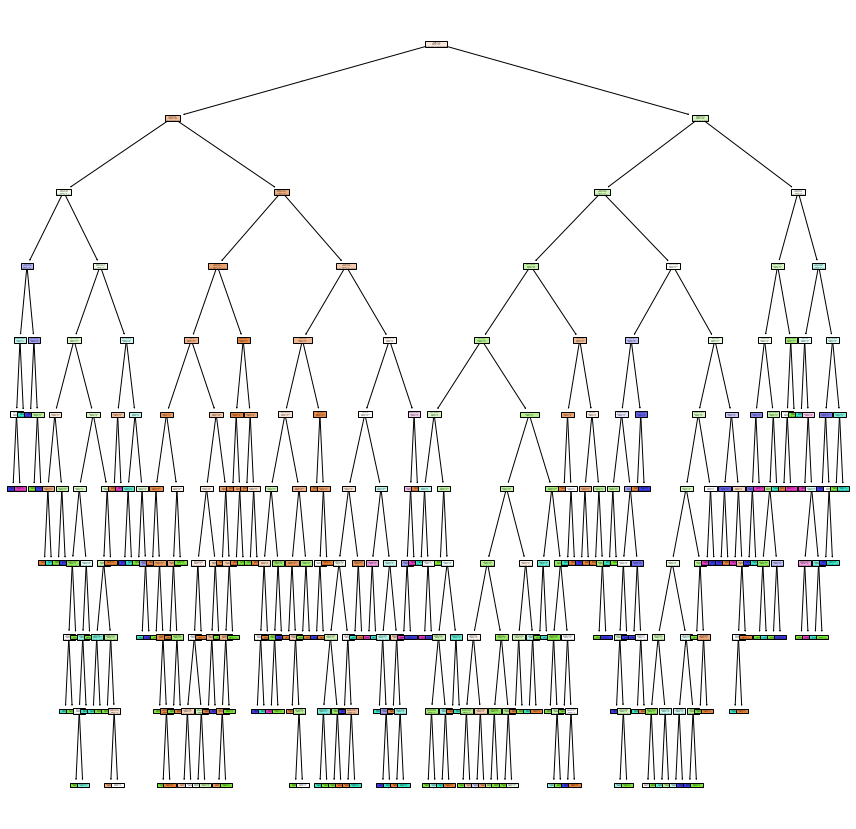

In [75]:
plt.figure(figsize=(15,15))
plot_tree(model, feature_names=fnames,filled=True )
plt.show()